In [103]:
import yfinance as yf
import matplotlib.pyplot as plt

In [104]:
stock_symbol = 'GAIL.NS'

In [105]:
data = yf.download(tickers=stock_symbol, period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [106]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,115.599998,116.966667,114.133331,115.150002,90.837753,10956261
2019-05-06,113.983330,117.050003,113.716667,115.416664,91.048103,13003578
2019-05-07,116.000000,118.983330,113.216667,113.583336,89.601868,10369371
2019-05-08,113.666664,115.050003,112.133331,112.500000,88.747246,11045511
2019-05-09,112.366669,113.816666,111.016663,113.466667,89.509834,8284242


In [107]:
open = data[['Open']]
ds = open.values

<Axes: xlabel='Date'>

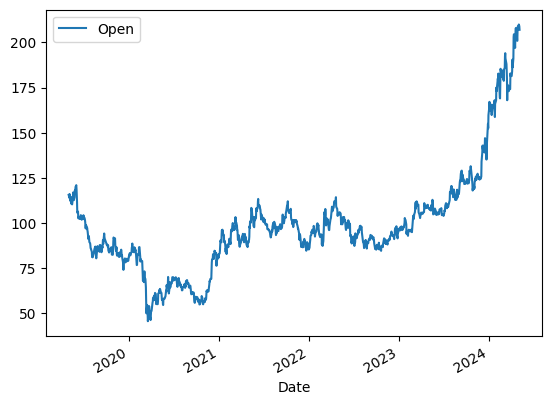

In [108]:
open.plot()

In [109]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [110]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [111]:
len(ds_scaled), len(ds)

(1237, 1237)

In [112]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [113]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [114]:
len(ds_train),len(ds_test)

(865, 372)

In [115]:
len(X_train), len(X_test)

(477, 0)

In [116]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [117]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [118]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [119]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [120]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

C:\Users\pioru\.julia\conda\3\x86_64\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0300 - val_loss: 0.0705
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0052 - val_loss: 0.0192
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0024 - val_loss: 0.0180
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0017 - val_loss: 0.0107
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/st

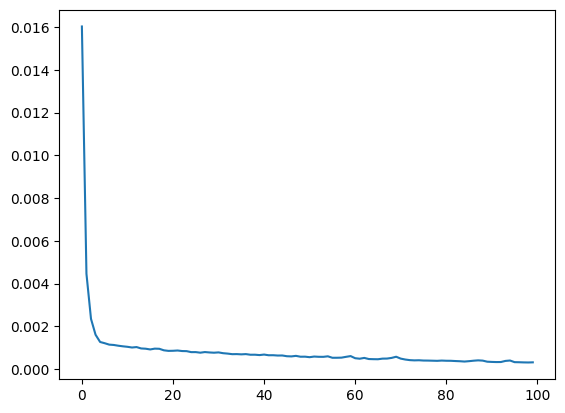

In [122]:
loss = model.history.history['loss']
plt.plot(loss)

In [123]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [124]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

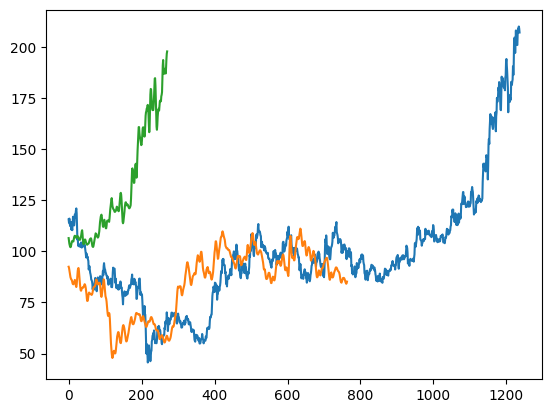

In [125]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [126]:
test = np.vstack((train_predict,test_predict))

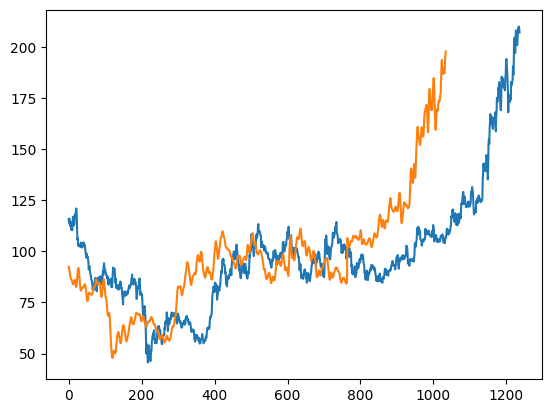

In [127]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [143]:
fut_inp = ds_test[271:]

In [144]:
fut_inp = fut_inp.reshape(1,-1)

In [145]:
tmp_inp = list(fut_inp)

In [146]:
fut_inp.shape

(1, 101)

In [147]:
fut_inp.shape

(1, 101)

In [148]:
tmp_inp = tmp_inp[0].tolist()

In [149]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9052514433860779], [0.856274425983429], [0.793774425983429], [0.7310171127319336], [0.6750355958938599], [0.6296898722648621], [0.596490740776062], [0.5750392079353333], [0.5636420845985413], [0.5599223375320435], [0.5612508058547974], [0.5650060176849365], [0.5687459111213684], [0.5703602433204651], [0.5682278871536255], [0.5613594651222229], [0.5494848489761353], [0.5330449938774109], [0.5130746960639954], [0.4909916818141937], [0.46833550930023193], [0.4465219974517822], [0.4266606271266937], [0.4094642400741577], [0.3952474296092987], [0.3839859664440155], [0.37540289759635925], [0.3690590560436249], [0.3644302189350128], [0.36097079515457153]]


In [150]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

ValueError: x and y must have same first dimension, but have shapes (100,) and (105, 1)

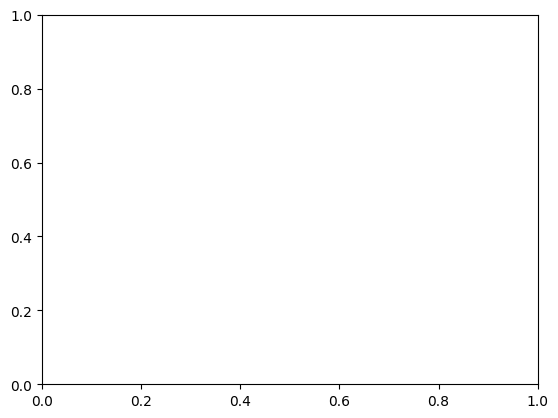

In [151]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1132:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [152]:
ds_new = ds_scaled.tolist()

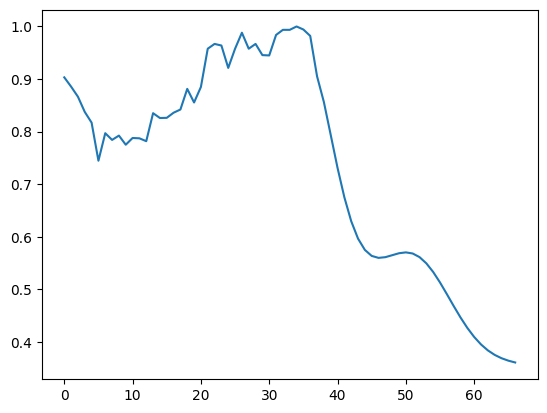

In [153]:
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [154]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

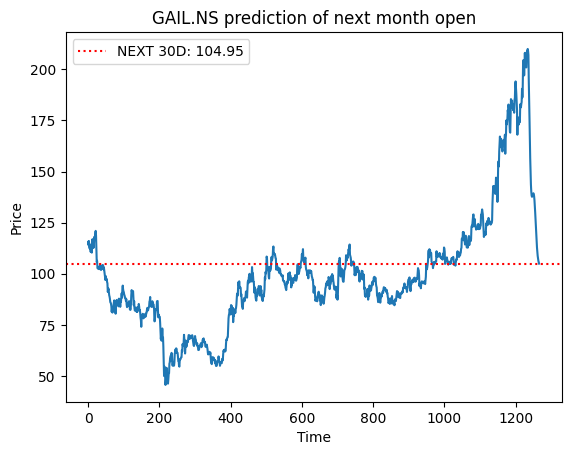

In [155]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()
